<a href="https://colab.research.google.com/github/letisalbal/Final-Project/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline

In [303]:
#Import the CSV File
from google.colab import files 
uploaded = files.upload() 

Saving heart.csv to heart (4).csv


In [304]:
#Read and Display CSV File
import io
data = io.BytesIO(uploaded['heart.csv'])

heart_df = pd.read_csv(data)
heart_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [305]:
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [306]:
#Rename the Columns
heart_df2 = (heart_df.rename(columns={"age": "Age", 
                                            "sex": "Gender", 
                                            "cp": "ChestPain", 
                                            "trestbps": "RestingBloodPressure", 
                                            "chol": "Cholesterol", 
                                            "fbs": "FastingBloodSugar", 
                                            "restecg": "RestingECG", 
                                            "thalach": "MaxHeartrate", 
                                            "exang":"ExerciseIndusedAngina",
                                            "oldpeak": "OldPeak",
                                            "slope": "Slope",
                                            "ca": "MajorVessels",
                                            "thal": "Thalassemia",
                                            "target": "Target"}))

heart_df2.head()

,Age,Gender,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartrate,ExerciseIndusedAngina,OldPeak,Slope,MajorVessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [0]:
#Replace Values in Gender Column
#heart_df2['Gender'].replace([0,1], ['Female', 'Male'], inplace=True)
#heart_df2.head()


In [0]:
#Replace Values in Chest Pain Column
#heart_df2['ChestPain'].replace([0,1,2,3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Fasting Blood Sugar Column
#heart_df2['FastingBloodSugar'].replace([0,1], ['False', 'True'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Exercise Indused Angina Column
#heart_df2['ExerciseIndusedAngina'].replace([0,1], ['No', 'Yes'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Slope Column
#heart_df2['Slope'].replace([0,1,2], ['unsloping', 'flat', 'downsloping'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Thalassemia Column
#heart_df2['Thalassemia'].replace([0,1,2,3], ['N/A','Normal', 'Fixed_Defect', 'Reversable_Defect'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Target Column
#heart_df2['Target'].replace([1,0], ['Heart Problem', 'No Heart Problem'], inplace=True)
#heart_df2.head()

In [313]:
#Print Entire Dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
heart_df2.head()

,Age,Gender,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartrate,ExerciseIndusedAngina,OldPeak,Slope,MajorVessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [314]:
# Description
heart_df2.describe()

,Age,Gender,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartrate,ExerciseIndusedAngina,OldPeak,Slope,MajorVessels,Thalassemia,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [315]:
heart_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
Age                      1025 non-null int64
Gender                   1025 non-null int64
ChestPain                1025 non-null int64
RestingBloodPressure     1025 non-null int64
Cholesterol              1025 non-null int64
FastingBloodSugar        1025 non-null int64
RestingECG               1025 non-null int64
MaxHeartrate             1025 non-null int64
ExerciseIndusedAngina    1025 non-null int64
OldPeak                  1025 non-null float64
Slope                    1025 non-null int64
MajorVessels             1025 non-null int64
Thalassemia              1025 non-null int64
Target                   1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [316]:
heart_df2["Target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Target, dtype: float64

In [317]:
heart_df2["Target"].unique()

array([0, 1])

In [318]:
print(heart_df2.corr())

                            Age    Gender  ChestPain  RestingBloodPressure  \
Age                    1.000000 -0.103240  -0.071966              0.271121   
Gender                -0.103240  1.000000  -0.041119             -0.078974   
ChestPain             -0.071966 -0.041119   1.000000              0.038177   
RestingBloodPressure   0.271121 -0.078974   0.038177              1.000000   
Cholesterol            0.219823 -0.198258  -0.081641              0.127977   
FastingBloodSugar      0.121243  0.027200   0.079294              0.181767   
RestingECG            -0.132696 -0.055117   0.043581             -0.123794   
MaxHeartrate          -0.390227 -0.049365   0.306839             -0.039264   
ExerciseIndusedAngina  0.088163  0.139157  -0.401513              0.061197   
OldPeak                0.208137  0.084687  -0.174733              0.187434   
Slope                 -0.169105 -0.026666   0.131633             -0.120445   
MajorVessels           0.271551  0.111729  -0.176206            

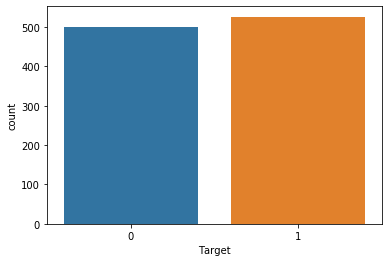

In [319]:
# Exploring Data Analysis

# Analyzing the target variable:

y = heart_df2["Target"]
sns.countplot(y)

In [320]:
target_temp = heart_df2.Target.value_counts()
print(target_temp)

1    526
0    499
Name: Target, dtype: int64


In [321]:
print("Percentage of Patients without Heart Problems: "+str(round(target_temp[0]*100/303,2)))

print("Percentage of Patients with Heart Problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of Patients without Heart Problems: 164.69
Percentage of Patients with Heart Problems: 173.6


In [322]:
heart_df2["Gender"].unique()

array([1, 0])

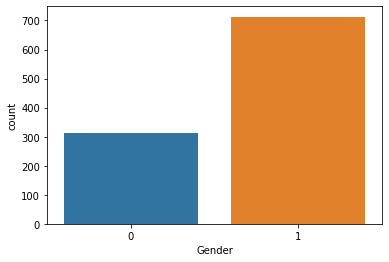

In [323]:
# Analyzing the "Heart Disease Data" feature:
sns.countplot(data=heart_df2, x = 'Gender')

In [324]:
#Analyzing chest pain type
heart_df2["ChestPain"].unique()

array([0, 1, 2, 3])

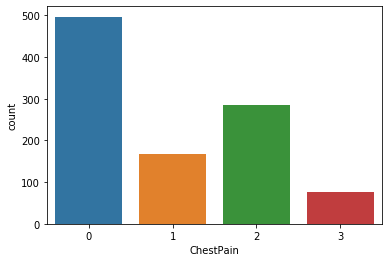

In [325]:
sns.countplot(data=heart_df2, x = 'ChestPain')

In [326]:
#Analyze FBS feature
heart_df2["FastingBloodSugar"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FastingBloodSugar, dtype: float64

In [327]:
heart_df2["FastingBloodSugar"].unique()

array([0, 1])

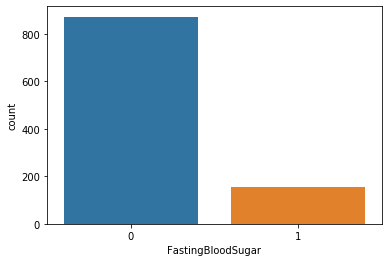

In [328]:
sns.countplot(data=heart_df2, x = 'FastingBloodSugar')

In [329]:
#restecg feature
heart_df2["RestingECG"].unique()


array([1, 0, 2])

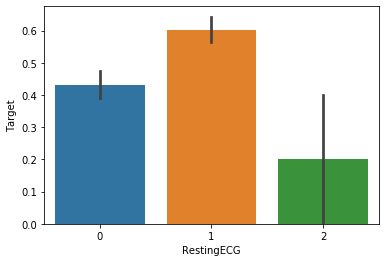

In [330]:
sns.barplot(heart_df2["RestingECG"],y)

In [331]:
#exang feature
heart_df2["ExerciseIndusedAngina"].unique()

array([0, 1])

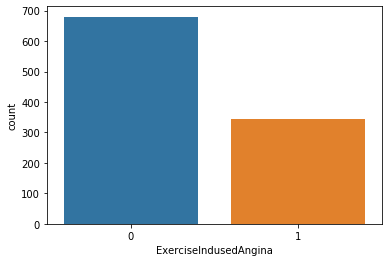

In [332]:
sns.countplot(data=heart_df2, x = 'ExerciseIndusedAngina')

In [333]:
#slope feature
heart_df2["Slope"].unique()

array([2, 0, 1])

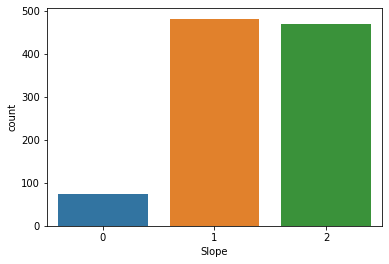

In [334]:
sns.countplot(data=heart_df2, x = 'Slope')

In [335]:
#ca feature
heart_df2["MajorVessels"].unique()

array([2, 0, 1, 3, 4])

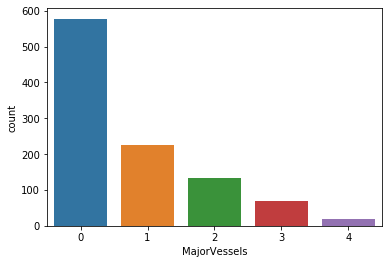

In [336]:
sns.countplot(heart_df2["MajorVessels"])

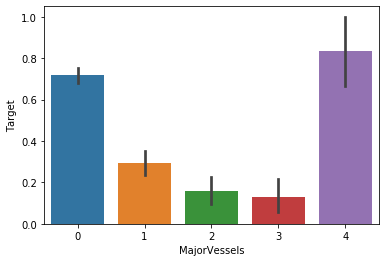

In [337]:
sns.barplot(heart_df2["MajorVessels"],y)

In [338]:
#thal feature
heart_df2["Thalassemia"].unique()

array([3, 2, 1, 0])

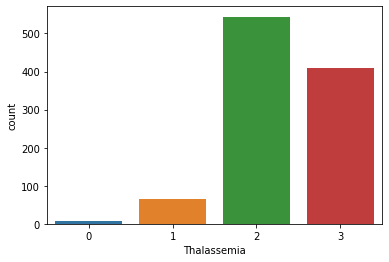

In [339]:
sns.countplot(data=heart_df2, x = 'Thalassemia')

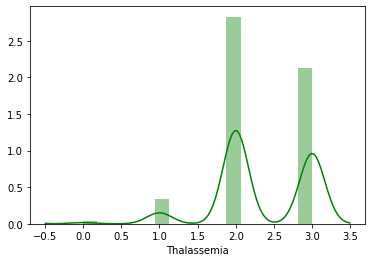

In [340]:
sns.distplot(heart_df2['Thalassemia'], color = "green")

Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

predictors = heart_df2.drop("Target", axis=1)
target = heart_df2["Target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [342]:
X_train.shape

(820, 13)

In [343]:
X_test.shape

(205, 13)

In [344]:
Y_train.shape

(820,)

In [345]:
Y_test.shape

(205,)

In [0]:
# Model Fitting

from sklearn.metrics import accuracy_score

In [347]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [348]:
Y_pred_lr.shape

(205,)

In [349]:
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100,2)

print("The accuracy score acheived using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score acheived using Logistic Regression is: 86.34 %
